<a href="https://colab.research.google.com/github/AldairToSayH/Dogs-vs-Cats/blob/main/training_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPU disponible: []
Descargando dataset de Kaggle...


100%|██████████| 64.4M/64.4M [00:00<00:00, 168MB/s]

Extracting files...


Dataset descargado en: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4
Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4942 - loss: 0.7157 - val_accuracy: 0.5636 - val_loss: 0.6845
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5965 - loss: 0.6885 - val_accuracy: 0.5091 - val_loss: 0.6914
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5318 - loss: 0.6931 - val_accuracy: 0.5909 - val_loss: 0.6725
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6010 - loss: 0.6788 - val_accuracy: 0.6455 - val_loss: 0.6467
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5974 - loss: 0.6688 - val_accuracy: 0.4909 - val_loss: 0.7248
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5948 - loss: 0.6811 - val_accuracy: 0.5818 - val_loss: 0.6506
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6323 - loss: 0.6538 - val_accuracy: 0.6545 - val_loss: 0.6363
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6064 - loss: 0.6462 - val_accuracy: 0.6273 - v

¡Modelo entrenado! Sube una imagen para probar:


Saving Captura de pantalla 2025-09-28 233327.png to Captura de pantalla 2025-09-28 233327.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


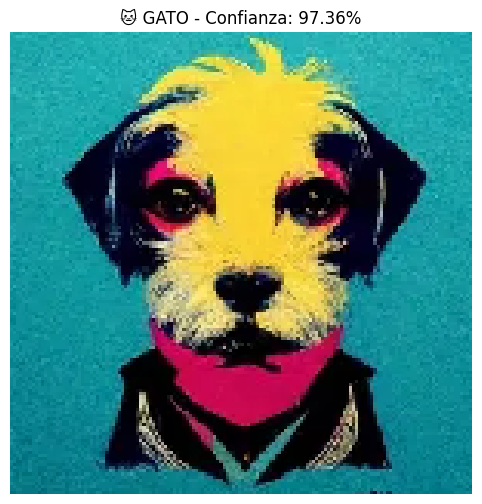

In [1]:
# En Google Colab - versión optimizada
!pip install kagglehub -q
!pip install tensorflow -q

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from google.colab import files
import cv2

# Verificar si tenemos GPU
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Descargar dataset
print("Descargando dataset de Kaggle...")
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")
print(f"Dataset descargado en: {path}")

# Configuración
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 100

# Data generators con aumento de datos
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    path + "/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    path + "/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Modelo CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar con GPU (mucho más rápido en Colab)
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Guardar modelo
model.save('cats_dogs_model.h5')

# Función para subir y predecir imágenes
def upload_and_predict():
    """Sube una imagen y hace la predicción"""
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Preprocesar imagen
        img = keras.preprocessing.image.load_img(filename, target_size=IMG_SIZE)
        img_array = keras.preprocessing.image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predecir
        prediction = model.predict(img_array)[0][0]

        # Mostrar resultado
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')

        if prediction > 0.5:
            plt.title(f'🐶 PERRO - Confianza: {prediction:.2%}')
        else:
            plt.title(f'🐱 GATO - Confianza: {(1-prediction):.2%}')

        plt.show()

# Probar con una imagen que subas
print("¡Modelo entrenado! Sube una imagen para probar:")
upload_and_predict()